## Plot Training Loss History of Helmholtz Problem
We already saved the training loss history in the saved checkpoints.



In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import sys
import os
import torch
import numpy as np
from matplotlib import pyplot as plt


In [13]:
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "./"))

if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

from src.utils.logger import Logging
from src.utils.plot_loss import plot_loss_history
from src.utils.color import model_color
from src.poisson.cv_solver import CVPDESolver
from src.poisson.dv_solver import DVPDESolver
from src.poisson.classical_solver import Classical_Solver


In [14]:
TEST_CHECKPOINT_PATH = os.path.join(PROJECT_ROOT, "./testing_checkpoints/helmholtz")

logger = Logging(TEST_CHECKPOINT_PATH)
model_dirname = logger.get_output_dir()

In [15]:


# dv_angle_circuit19 = "./checkpoints/helmholtz/2025-01-21_15-25-07-805635"
# dv_angle_circuit5 = "./checkpoints/helmholtz/2025-01-21_15-02-22-049143"
# dv_angle_alternate = "./checkpoints/helmholtz/2025-01-21_15-57-56-893468"

# dv_amp_alternate = "./checkpoints/helmholtz/2025-01-31_16-22-23-041398"
# dv_amp_circuit5 = "./checkpoints/helmholtz/2025-01-31_16-24-09-831849"
# dv_amp_circuit19 = "./checkpoints/helmholtz/2025-01-31_16-23-43-289401"

# cv1 = "./checkpoints/helmholtz/2025-01-31_19-43-22-617030"
# classical= "./checkpoints/helmholtz/2025-01-25_16-55-21-506277"




dv_angle_circuit19 = (
    "./log_files/checkpoints/helmholtz/2025-02-06_19-25-14-069398"  # circ_19
)
dv_angle_circuit5 = (
    "./log_files/checkpoints/helmholtz/2025-02-06_19-32-04-408294"  #
)
dv_angle_alternate = (
    "./log_files/checkpoints/helmholtz/2025-02-06_19-25-14-069609"  #
)

dv_amp_alternate = (
    "./log_files/checkpoints/helmholtz/2025-02-06_18-54-03-851796"  #
)
dv_amp_circuit5 = (
    "./log_files/checkpoints/helmholtz/2025-02-06_18-52-46-865258"  #
)
dv_amp_circuit19 = (
    "./log_files/checkpoints/helmholtz/2025-02-06_18-48-39-607215"  # circ_19
)

cv1 = (
    "./log_files/checkpoints/helmholtz/2025-02-06_18-10-42-119955"  # sim_circ_13_half
)

gcv = (
    "./log_files/checkpoints/helmholtz/2025-02-09_20-05-25-094982"  # sim_circ_13_half
)

classical= ("./log_files/checkpoints/helmholtz/2025-02-09_00-01-28-238904")

# classical= (
#     "./log_files/checkpoints/helmholtz/2025-02-08_23-11-24-881079"
#     )


MODEL_PATH_LIST = {
    dv_angle_circuit19: "dv",
    dv_angle_circuit5: "dv",
    dv_angle_alternate: "dv",
    dv_amp_alternate: "dv",
    dv_amp_circuit5: "dv",
    dv_amp_circuit19: "dv",
    cv1: "cv",
    gcv: "cv",
    classical: "classical",
}

MODEL_Type_LIST = {
    dv_angle_circuit19: "angle_circuit19",
    dv_angle_circuit5: "angle_circuit5",
    dv_angle_alternate: "angle_alternate",
    dv_amp_alternate: "amp_alternate",
    dv_amp_circuit5: "amp_circuit5",
    dv_amp_circuit19: "amp_circuit19",
    cv1: "cv",
    gcv: "gcv",
    classical: "classical",
}


In [18]:


all_loss_history = {}

for  model_path,solver in MODEL_PATH_LIST.items():

    if solver == "cv":
        state = CVPDESolver.load_state(os.path.join(model_path, "model.pth"))
        model = CVPDESolver(state["args"], logger)

        model.preprocessor.load_state_dict(state["preprocessor"])
        model.quantum_layer.load_state_dict(state["quantum_layer"])
        model.postprocessor.load_state_dict(state["postprocessor"])

    elif solver == "classical":
        state = Classical_Solver.load_state(os.path.join(model_path, "model.pth"))
        model = Classical_Solver(state["args"], logger)

    else:
        state = DVPDESolver.load_state(os.path.join(model_path, "model.pth"))
        model = DVPDESolver(state["args"], logger)
        model.preprocessor.load_state_dict(state["preprocessor"])
        model.postprocessor.load_state_dict(state["postprocessor"])
        model.quantum_layer.load_state_dict(state["quantum_layer"])

    model.logger = logger
    # for key, value in model.args.items():
    #     model.logger.print(f"{key} : {value}")
    model.logger.print(f"Method used : , {MODEL_Type_LIST[model_path]}")
    model.logger.print(f"Totoal number of iterations : , {len(state['loss_history'])}")
    model.logger.print(f"The final loss : , {state['loss_history'][-1]}" if state['loss_history'] else "No loss history")
    total_params = sum(p.numel() for p in model.parameters())
    logger.print(f"Total number of parameters: {total_params}")

    # # Print total number of parameters
    # total_params = sum(p.numel() for p in model.parameters())
    # model.logger.print(f"Total number of parameters: {total_params}")

    all_loss_history[MODEL_Type_LIST[model_path]] = state["loss_history"]

INFO:src.utils.logger:Method used : , angle_circuit19
INFO:src.utils.logger:Totoal number of iterations : , 20000
INFO:src.utils.logger:The final loss : , 3.630709648132324
INFO:src.utils.logger:Total number of parameters: 776
INFO:src.utils.logger:Method used : , angle_circuit5
INFO:src.utils.logger:Totoal number of iterations : , 17600
INFO:src.utils.logger:The final loss : , 7.450779438018799
INFO:src.utils.logger:Total number of parameters: 836
INFO:src.utils.logger:Method used : , angle_alternate
INFO:src.utils.logger:Totoal number of iterations : , 20000
INFO:src.utils.logger:The final loss : , 11.456033706665039
INFO:src.utils.logger:Total number of parameters: 781
INFO:src.utils.logger:Method used : , amp_alternate
INFO:src.utils.logger:Totoal number of iterations : , 20000
INFO:src.utils.logger:The final loss : , 55.36176681518555
INFO:src.utils.logger:Total number of parameters: 781
INFO:src.utils.logger:Method used : , amp_circuit5
INFO:src.utils.logger:Totoal number of iter

Model state loaded from ./log_files/checkpoints/helmholtz/2025-02-06_19-25-14-069398/model.pth
Model state loaded from ./log_files/checkpoints/helmholtz/2025-02-06_19-32-04-408294/model.pth
Model state loaded from ./log_files/checkpoints/helmholtz/2025-02-06_19-25-14-069609/model.pth
Model state loaded from ./log_files/checkpoints/helmholtz/2025-02-06_18-54-03-851796/model.pth
Model state loaded from ./log_files/checkpoints/helmholtz/2025-02-06_18-52-46-865258/model.pth
Model state loaded from ./log_files/checkpoints/helmholtz/2025-02-06_18-48-39-607215/model.pth
Model state loaded from ./log_files/checkpoints/helmholtz/2025-02-06_18-10-42-119955/model.pth
Model state loaded from ./log_files/checkpoints/helmholtz/2025-02-09_20-05-25-094982/model.pth


INFO:src.utils.logger:checkpoint path: self.log_path='/okyanus/users/afarea/afrah/code/QNN4PDEs/./testing_checkpoints/helmholtz/2025-02-10_14-05-38-949654'
INFO:src.utils.logger:Method used : , classical
INFO:src.utils.logger:Totoal number of iterations : , 20000
INFO:src.utils.logger:The final loss : , 6.134862422943115
INFO:src.utils.logger:Total number of parameters: 2751


Model state loaded from ./log_files/checkpoints/helmholtz/2025-02-09_00-01-28-238904/model.pth


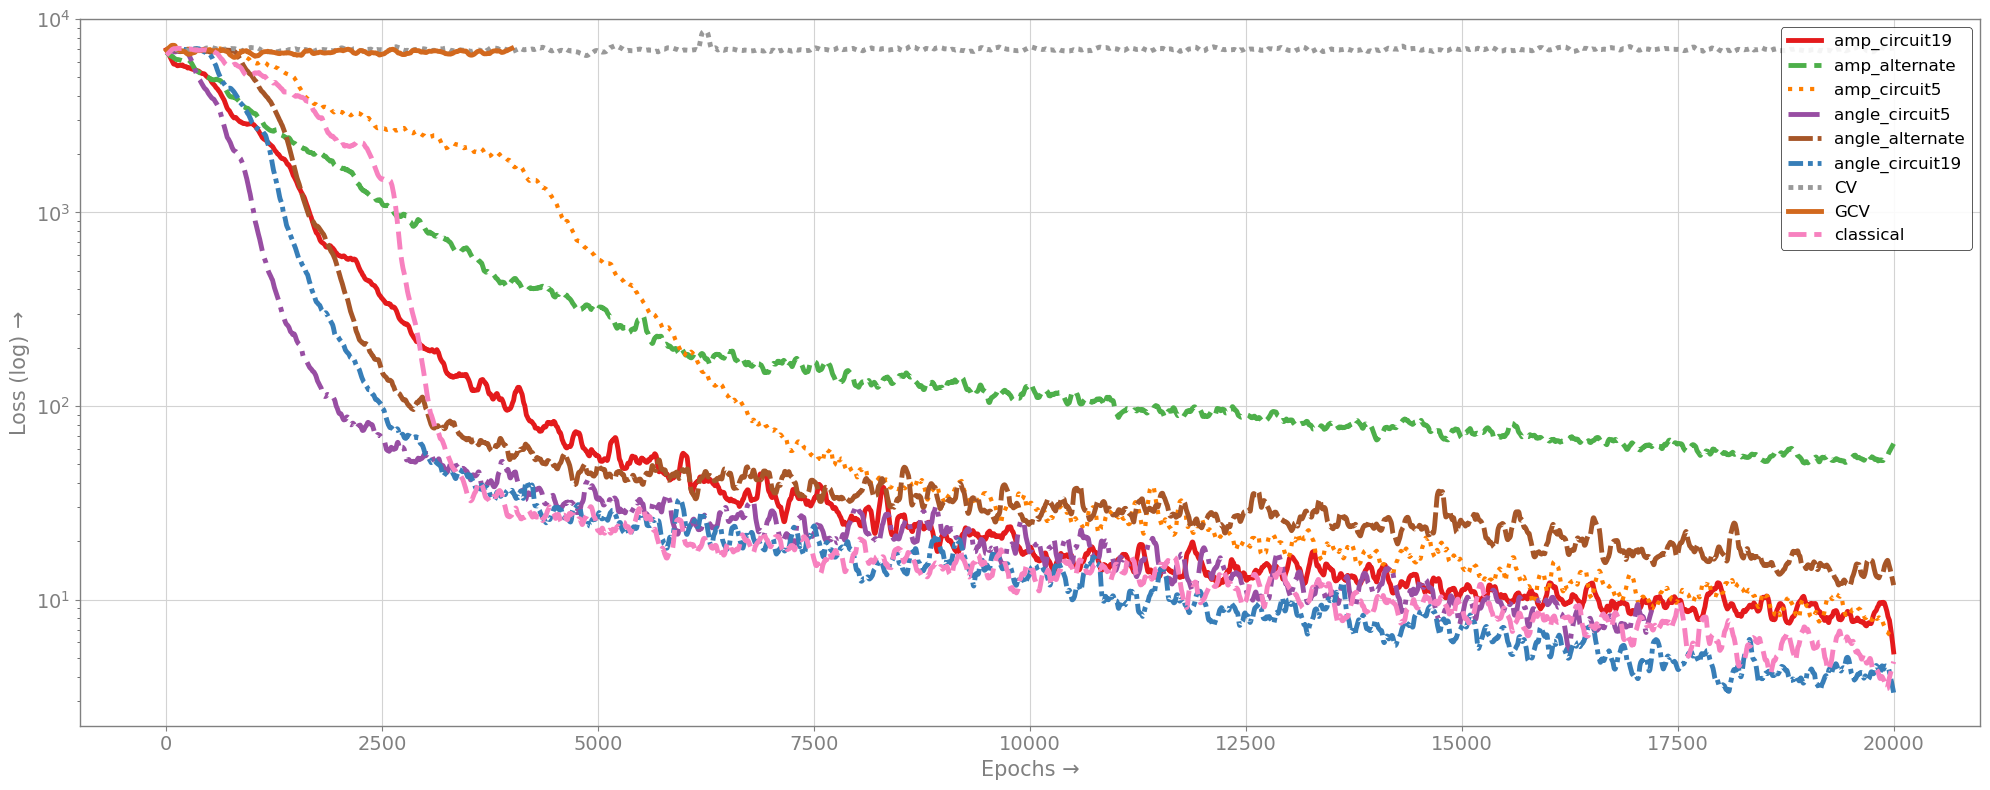

In [17]:
data_list = [
    {
        "data": all_loss_history["amp_circuit19"],
        "color": model_color["amp_circuit19"],
        "name": "amp_circuit19",
        "alpha": 1.0,  # Increased from 0.9
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": "-",
        "linewidth": 3.5  # Added line width
    },
    {
        "data": all_loss_history["amp_alternate"],
        "color": model_color["amp_alternate"],
        "name": "amp_alternate",
        "alpha": 1.0,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": "--",
        "linewidth": 3.5
    },
    {
        "data": all_loss_history["amp_circuit5"],
        "color": model_color["amp_circuit5"],
        "name": "amp_circuit5",
        "alpha": 1.0,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": ":",
        "linewidth": 3.0  # Slightly thicker for dotted lines
    },
    {
        "data": all_loss_history["angle_circuit5"],
        "color": model_color["angle_circuit5"],
        "name": "angle_circuit5",
        "alpha": 1.0,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": "-.",
        "linewidth": 3.5
    },
    {
        "data": all_loss_history["angle_alternate"],
        "color": model_color["angle_alternate"],
        "name": "angle_alternate",
        "alpha": 1.0,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": (0, (5, 1)),
        "linewidth": 3.5
    },
    {
        "data": all_loss_history["angle_circuit19"],
        "color": model_color["angle_circuit19"],
        "name": "angle_circuit19",
        "alpha": 1.0,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": (0, (3, 1, 1, 1)),
        "linewidth": 3.5
    },
    {
        "data": all_loss_history["cv"],
        "color": model_color["cv"],
        "name": "CV",
        "alpha": 1.0,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": (0, (1, 1)),
        "linewidth": 3.5
    },
    {
        "data": all_loss_history["gcv"],
        "color": model_color["gcv"],
        "name": "GCV",
        "alpha": 1.0,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": "-",
        "linewidth": 3.5
    },
    {
        "data": all_loss_history["classical"],
        "color": model_color["classical"],
        "name": "classical",
        "alpha": 1.0,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": "--",
        "linewidth": 3.5
    }
]

plot_loss_history(
    data_list,
    os.path.join(logger.get_output_dir(), "loss_history_cavity.png"),
    y_max=10000,
)